In [44]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [45]:
caminho_arquivo_csv = os.path.join(os.path.dirname('03 - Projeto'), '..', '..', 'datasets')
df = pd.read_csv( os.path.join(caminho_arquivo_csv, 'filmes_total.csv'))

In [46]:
df.head()

year_ceremony                 category           name                film  \
0           2001  actor in a leading role  javier bardem  before night falls   
1           2001  actor in a leading role  russell crowe           gladiator   
2           2001  actor in a leading role      tom hanks           cast away   
3           2001  actor in a leading role      ed harris             pollock   
4           2001  actor in a leading role  geoffrey rush              quills   

   winner          Movie Name  Year of Release        Gross  \
0   False  before night falls             2000    4220000.0   
1    True           gladiator             2000  187710000.0   
2   False           cast away             2000  233630000.0   
3   False             pollock             2000    8600000.0   
4   False              quills             2000    7060000.0   

                         Genre  \
0  biography,  drama,  romance   
1   action,  adventure,  drama   
2  adventure,  drama,  romance   
3            biography,  drama   
4            biography,  drama   

                                               Stars  media_idade  qtd_atores  \
0  javier bardem, johnny depp, olatz lopez garmen...        34.00         2.0   
1  russell crowe, joaquin phoenix, connie nielsen...        39.75         4.0   
2    tom hanks, helen hunt, paul sanchez, lari white        46.25         4.0   
3  ed harris, marcia gay harden, robert knott, mo...        45.50         2.0   
4  geoffrey rush, kate winslet, joaquin phoenix, ...        41.75         4.0   

   qtd_atores_etnia  qtd_atores_genero  qtd_mulheres  qtd_non_white  \
0               1.0                2.0           0.0            0.0   
1               4.0                4.0           1.0            0.0   
2               2.0                4.0           2.0            0.0   
3               2.0                2.0           1.0            0.0   
4               4.0                4.0           1.0            0.0   

   variancia_idade  porcentagem_mulheres  porcentagem_non_white  
0            18.00                   0.0                    0.0  
1           240.25                  25.0                    0.0  
2           244.92                  50.0                    0.0  
3            40.50                  50.0                    0.0  
4           406.25                  25.0                    0.0

In [47]:
df = df[df['winner']==True]

# Usando Etnia

### Usando Min Max Scaler

In [48]:
dfX = df[['media_idade','porcentagem_mulheres','porcentagem_non_white']]
dfX.fillna(0,inplace=True)

dfX_norm = pd.DataFrame(
                  MinMaxScaler().fit_transform(dfX), 
                  index = dfX.index, 
                  columns=dfX.columns)

kmeans = KMeans(n_clusters = 3, random_state = 42)  
kmeans.fit(dfX_norm) 
df['cluster'] = kmeans.labels_

C:\Users\yasmi\AppData\Local\Temp\ipykernel_28872\3575966980.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfX.fillna(0,inplace=True)


<Axes: xlabel='media_idade', ylabel='porcentagem_mulheres'>

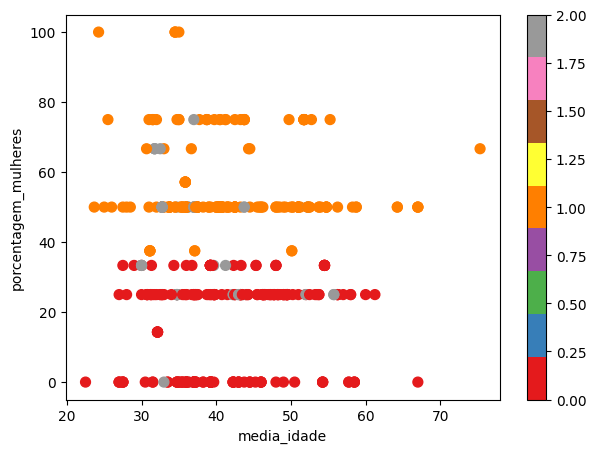

In [49]:
dfX.plot.scatter(x='media_idade', y='porcentagem_mulheres', s = 50, c = kmeans.labels_, colormap='Set1', figsize=(7,5))

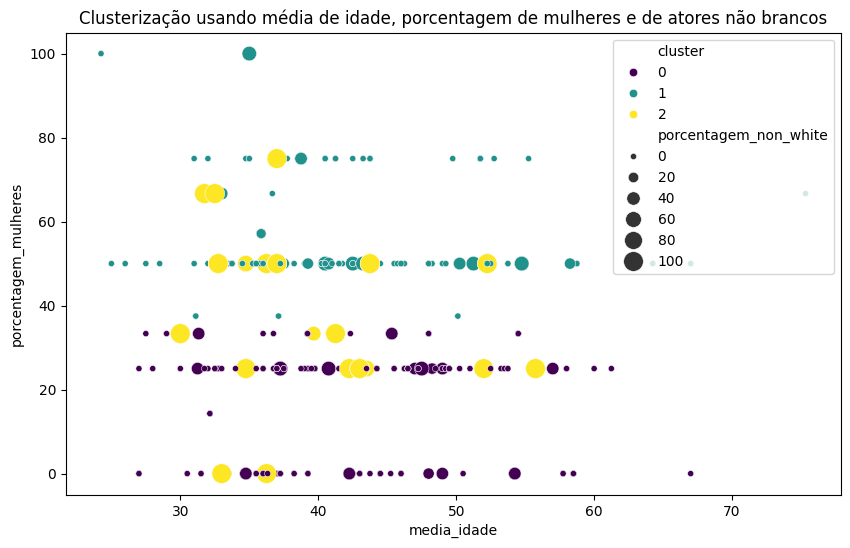

In [50]:
plt.figure(figsize=[10,6])
sns.scatterplot(data=df, x='media_idade', y='porcentagem_mulheres', hue='cluster',size='porcentagem_non_white',palette='viridis',sizes=(20, 200))
plt.title('Clusterização usando média de idade, porcentagem de mulheres e de atores não brancos')
plt.show()

## Usando Stardart Scaler

In [51]:
dfY = df[['media_idade', 'porcentagem_mulheres', 'porcentagem_non_white']]
dfY.fillna(0,inplace=True)

scaler = StandardScaler()
dfY_norm = scaler.fit_transform(dfY)

kmeans2 = KMeans(n_clusters=3, random_state=42)
kmeans2.fit(dfY_norm)

df['cluster2'] = kmeans2.labels_

C:\Users\yasmi\AppData\Local\Temp\ipykernel_28872\3468672466.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfY.fillna(0,inplace=True)


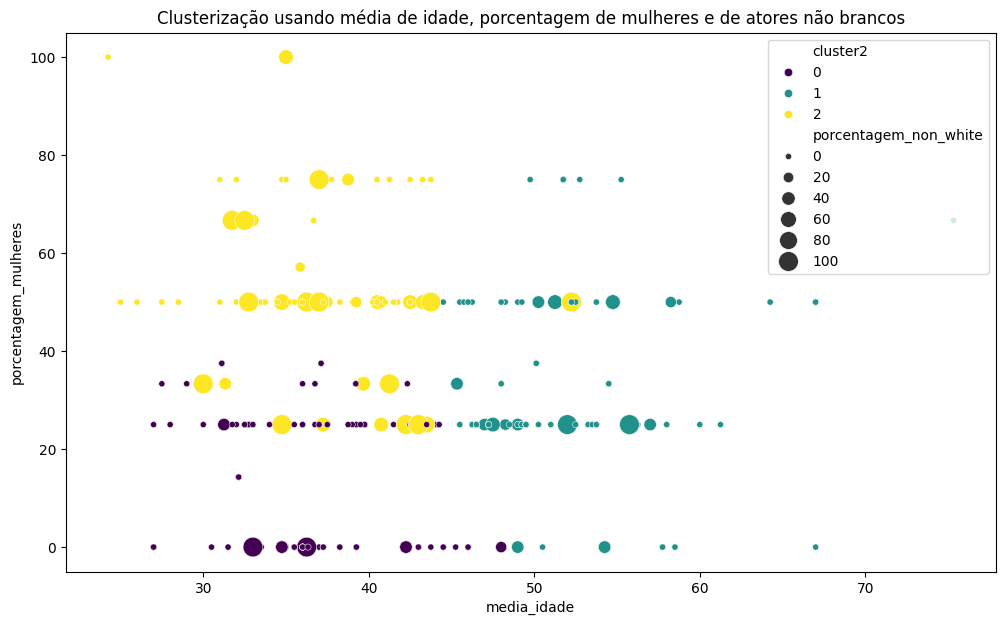

In [52]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='media_idade', y='porcentagem_mulheres', hue='cluster2', size='porcentagem_non_white', palette='viridis', sizes=(20, 200))
plt.title('Clusterização usando média de idade, porcentagem de mulheres e de atores não brancos')
plt.show()

## Usando o Cluster que aparece mais vezes
### usar não na vizualização porque fica a mesma coisa, mas sim pra entender quais categorias se agrupam

In [53]:
cluster_counts = df.groupby(['category', 'cluster2']).size().reset_index(name='count')
clusters_freq = cluster_counts.loc[cluster_counts.groupby('category')['count'].idxmax()]

In [54]:
dfs_filtrados = []
for _, row in clusters_freq.iterrows():
    category = row['category']
    cluster = row['cluster2']
    df_filtrado = df[(df['category'] == category) & (df['cluster2'] == cluster)]
    dfs_filtrados.append(df_filtrado)

df_resul = pd.concat(dfs_filtrados)
df_resul.head()

year_ceremony                 category               name  \
1             2001  actor in a leading role      russell crowe   
72            2002  actor in a leading role  denzel washington   
156           2003  actor in a leading role       adrien brody   
248           2004  actor in a leading role          sean penn   
598           2008  actor in a leading role    daniel daylewis   

                    film  winner           Movie Name  Year of Release  \
1              gladiator    True            gladiator             2000   
72          training day    True         training day             2001   
156          the pianist    True          the pianist             2002   
248         mystic river    True         mystic river             2003   
598  there will be blood    True  there will be blood             2007   

           Gross                       Genre  \
1    187710000.0  action,  adventure,  drama   
72    76630000.0      action,  crime,  drama   
156   32570000.0   biography,  drama,  music   
248   90140000.0     crime,  drama,  mystery   
598   40220000.0                       drama   

                                                 Stars  ...  qtd_atores  \
1    russell crowe, joaquin phoenix, connie nielsen...  ...         4.0   
72   denzel washington, ethan hawke, scott glenn, t...  ...         4.0   
156  adrien brody, thomas kretschmann, frank finlay...  ...         4.0   
248   sean penn, tim robbins, kevin bacon, emmy rossum  ...         4.0   
598  daniel daylewis, paul dano, ciaran hinds, mart...  ...         3.0   

     qtd_atores_etnia  qtd_atores_genero  qtd_mulheres  qtd_non_white  \
1                 4.0                4.0           1.0            0.0   
72                4.0                4.0           0.0            1.0   
156               4.0                4.0           1.0            0.0   
248               3.0                4.0           1.0            0.0   
598               2.0                3.0           0.0            0.0   

     variancia_idade  porcentagem_mulheres  porcentagem_non_white  cluster  \
1             240.25                  25.0                    0.0        0   
72            167.33                   0.0                   25.0        0   
156           506.25                  25.0                    0.0        0   
248           187.67                  25.0                    0.0        0   
598           284.33                   0.0                    0.0        0   

     cluster2  
1           0  
72          0  
156         0  
248         0  
598         0  

[5 rows x 21 columns]

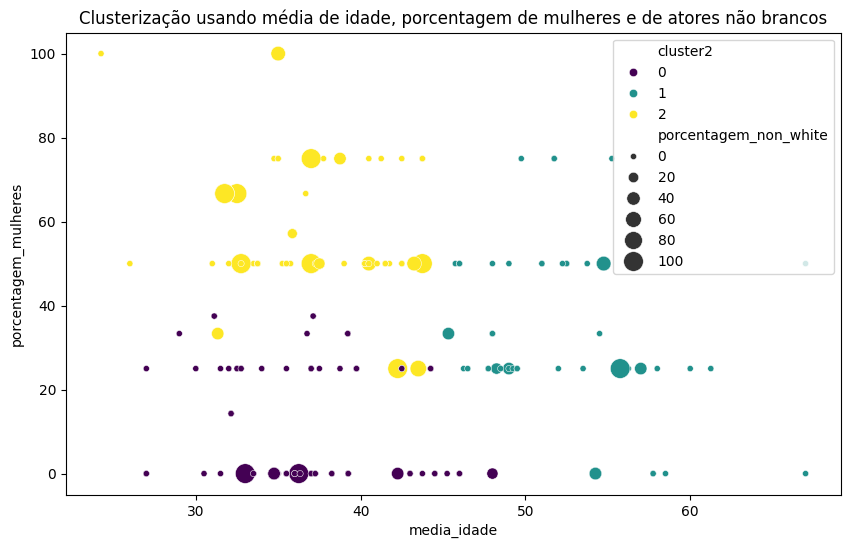

In [55]:
plt.figure(figsize=[10,6])
sns.scatterplot(data=df_resul, x='media_idade', y='porcentagem_mulheres', hue='cluster2',size='porcentagem_non_white',palette='viridis',sizes=(20, 200))
plt.title('Clusterização usando média de idade, porcentagem de mulheres e de atores não brancos')
plt.show()

In [56]:
df_resul[['category','cluster2']].drop_duplicates().sort_values(by='cluster2')

category  cluster2
1                               actor in a leading role         0
239                          writing adapted screenplay         0
58                                       visual effects         0
317                                        sound mixing         0
57                                        sound editing         0
46                                  music original song         0
112                                        film editing         0
199                                           directing         0
121                                              makeup         0
98                                       cinematography         0
74                           actor in a supporting role         1
354                               animated feature film         1
213                                music original score         1
1346                             makeup and hairstyling         1
152   writing screenplay written directly for the sc...         1
131                                        best picture         1
640                           documentary short subject         1
146   writing screenplay based on material previousl...         1
1843                         international feature film         2
208                               foreign language film         2
181                                       art direction         2
191                                      costume design         2
1370                                short film animated         2
1576                             short film live action         2
225                                               sound         2
175                        actress in a supporting role         2
79                            actress in a leading role         2
243                         writing original screenplay         2
1470                                  production design         2

# Usando a média dos valores
### achei errado

In [57]:
# df_medias = df.groupby('category')[['porcentagem_mulheres','porcentagem_non_white','media_idade']].mean().reset_index()
# df_m_dados = df_medias[['porcentagem_mulheres','porcentagem_non_white','media_idade']]

# scaler = StandardScaler()
# df_medias_norm = scaler.fit_transform(df_m_dados)

# kmeans2 = KMeans(n_clusters=3, random_state=42)
# kmeans2.fit(df_medias_norm)

# df_medias['cluster_media'] = kmeans2.labels_

In [58]:
plt.figure(figsize=[10,6])
# sns.scatterplot(data=df_medias, x='media_idade', y='porcentagem_mulheres', hue='cluster_media',size='porcentagem_non_white',palette='viridis',sizes=(20, 200))
# plt.title('Clusterização usando média de idade, porcentagem de mulheres e de atores não brancos')
# plt.show()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

## Cluster hierarquico
### ref: https://www.w3schools.com/python/python_ml_hierarchial_clustering.asp

In [59]:
from scipy.cluster.hierarchy import linkage, dendrogram

df_medias = df.groupby('category')[['porcentagem_mulheres','porcentagem_non_white','media_idade']].mean().reset_index()

scaler = StandardScaler()
df_norm = scaler.fit_transform(df_medias[['media_idade', 'porcentagem_mulheres', 'porcentagem_non_white']])

Text(0.5, 1.0, 'Dendrograma da Clusterização Hierárquica')

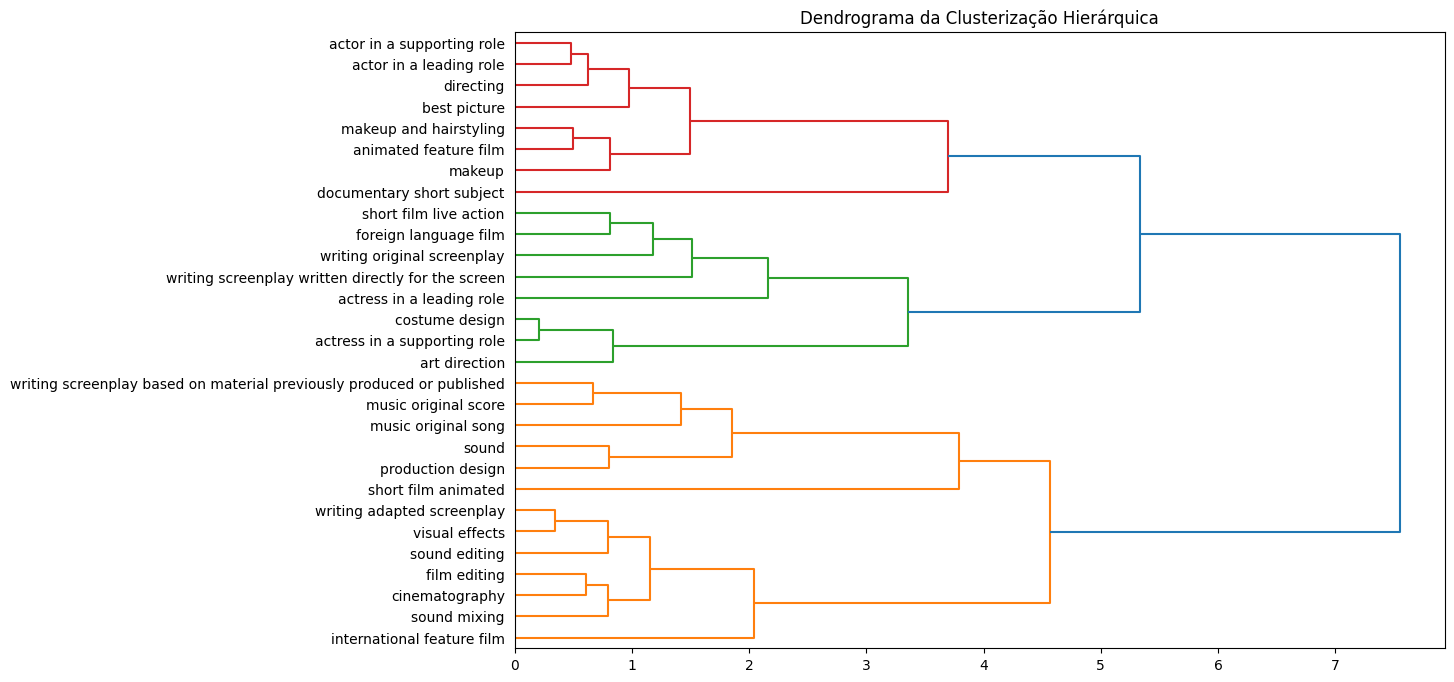

In [60]:
link = linkage(df_norm, method='ward',metric='euclidean')

plt.figure(figsize=(12, 8))
dendrogram(link, labels=df_medias['category'].values, leaf_rotation=0, leaf_font_size=10,orientation='right')
plt.title('Dendrograma da Clusterização Hierárquica')

# Sem etnia
### Quando não usamos etnia, o MinMax e o Standart ficam iguais

### Usando MinMaxScaler

In [61]:
dfX = df[['media_idade','porcentagem_mulheres']]
dfX.fillna(0,inplace=True)

dfX_norm = pd.DataFrame(
                  MinMaxScaler().fit_transform(dfX), 
                  index = dfX.index, 
                  columns=dfX.columns)

kmeans = KMeans(n_clusters = 3, random_state = 42)  
kmeans.fit(dfX_norm) 
df['cluster'] = kmeans.labels_

C:\Users\yasmi\AppData\Local\Temp\ipykernel_28872\1166947905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfX.fillna(0,inplace=True)


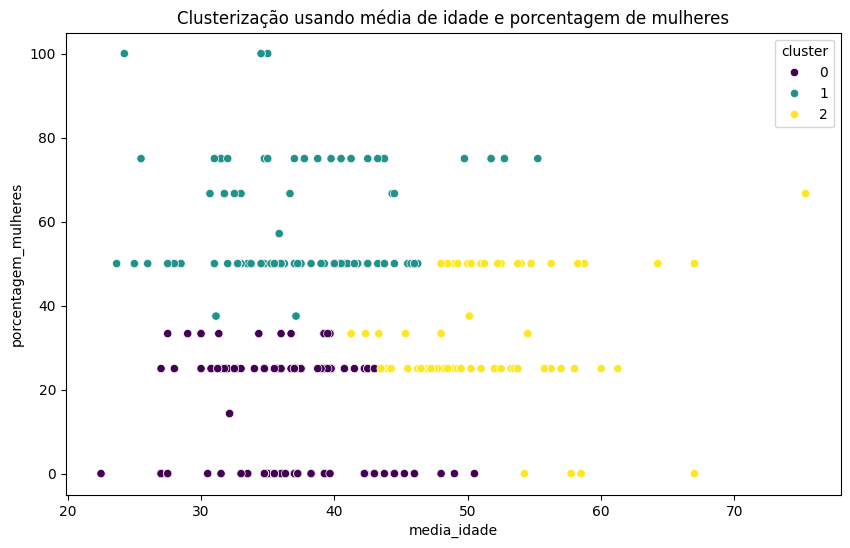

In [62]:
plt.figure(figsize=[10,6])
sns.scatterplot(data=df, x='media_idade', y='porcentagem_mulheres', hue='cluster',palette='viridis',sizes=100)
plt.title('Clusterização usando média de idade e porcentagem de mulheres')
plt.show()

### Usando StandartScaler

In [63]:
dfY = df[['media_idade', 'porcentagem_mulheres']]
dfY.fillna(0,inplace=True)

scaler = StandardScaler()
dfY_norm = scaler.fit_transform(dfY)

kmeans2 = KMeans(n_clusters=3, random_state=42)
kmeans2.fit(dfY_norm)

df['cluster2'] = kmeans2.labels_

C:\Users\yasmi\AppData\Local\Temp\ipykernel_28872\3726555895.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfY.fillna(0,inplace=True)


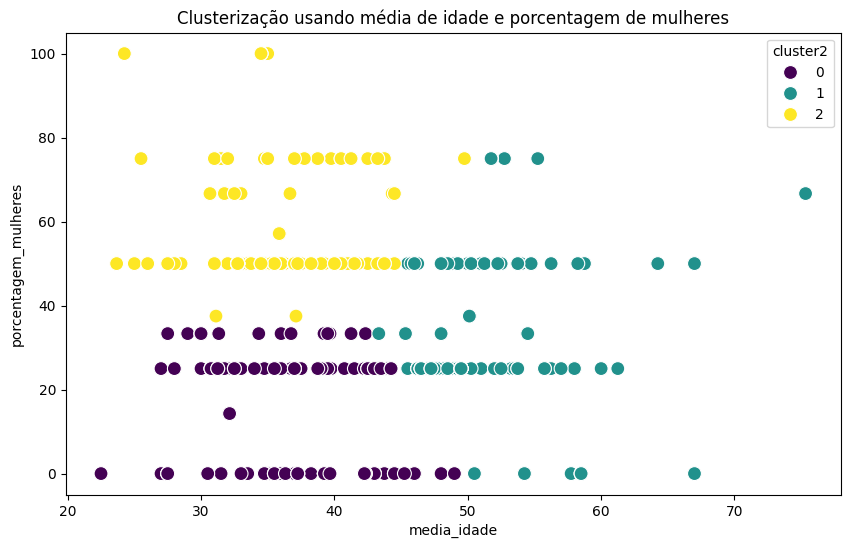

In [64]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='media_idade', y='porcentagem_mulheres', hue='cluster2',palette='viridis', s=100)
plt.title('Clusterização usando média de idade e porcentagem de mulheres')
plt.show()